# 线性回归

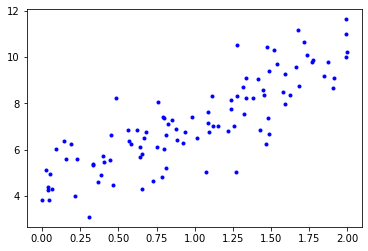

In [27]:
import numpy as np
import matplotlib.pyplot as plt
x = 2*np.random.rand(100, 1)
y = 4 + 3*x + np.random.randn(100, 1)
plt.plot(x, y, 'b.')
plt.show()

In [28]:
x_b = np.c_[np.ones((100,1)), x]

In [29]:
theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)
theta_best

array([[4.30999595],
       [2.8692635 ]])

In [30]:
x_new = np.array([[0], [2]])
x_new_b = np.c_[np.ones((2,1)), x_new]
x_new_b

array([[1., 0.],
       [1., 2.]])

In [31]:
y_pre = x_new_b.dot(theta_best)
y_pre

array([[ 4.30999595],
       [10.04852295]])

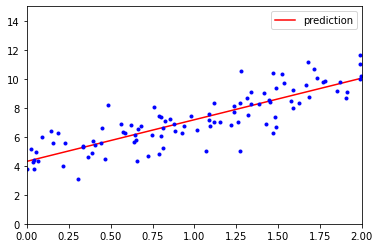

In [32]:
plt.plot(x_new, y_pre, 'r-', label='prediction')
plt.plot(x, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.legend()
plt.show()

# 多项式回归

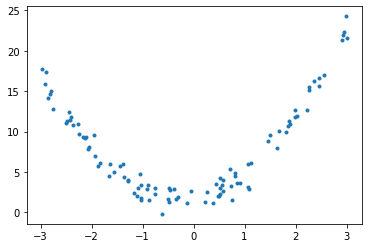

In [33]:
m = 100
x = 6*np.random.rand(m, 1) - 3
y = 2*x**2 + 2 + x + np.random.randn(m, 1)
plt.plot(x, y, '.')
plt.show()

In [34]:
from sklearn.preprocessing import PolynomialFeatures
ploy_f = PolynomialFeatures(degree=2, include_bias=False)
x_ploy = ploy_f.fit_transform(x)
x[0]

array([-2.12179649])

In [35]:
x_ploy[0]

array([-2.12179649,  4.50202036])

In [36]:
from sklearn.linear_model import LinearRegression
line_r = LinearRegression()
line_r.fit(x_ploy, y)
k1 = line_r.intercept_
k2 = line_r.coef_
k1 ,k2

(array([1.8201999]), array([[0.99040097, 2.02531893]]))

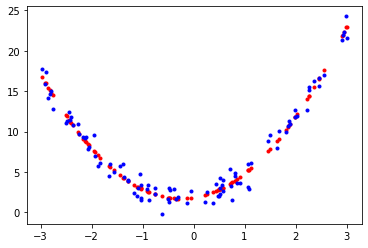

In [37]:
y_predict = line_r.predict(x_ploy)
plt.plot(x, y_predict, 'r.')
plt.plot(x, y, 'b.')
plt.show()

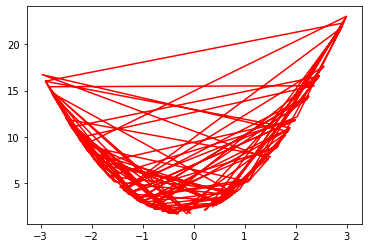

In [50]:
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt
y_predict_1 = y_predict.flatten()
y_predict_1
plt.plot(x, y_predict_1, 'r-')
plt.show()

# Learning Curve

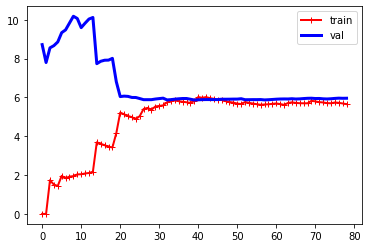

In [12]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def plot_learningcurve(model, x, y):
    x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2)
    train_error, val_error = [], []
    for m in range(1, len(x_train)):
        model.fit(x_train[:m], y_train[:m])
        y_train_pre = model.predict(x_train[:m])
        y_val_pre = model.predict(x_val)
        train_error.append(mean_squared_error(y_train[:m], y_train_pre))
        val_error.append(mean_squared_error(y_val, y_val_pre))
    plt.plot(np.sqrt(train_error), 'r-+', linewidth=2, label='train')
    plt.plot(np.sqrt(val_error), 'b-', linewidth=3, label='val')
    plt.legend()

plot_learningcurve(line_r, x, y)

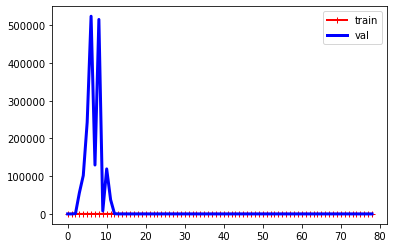

In [13]:
from sklearn.pipeline import Pipeline
ploynomial_regression = Pipeline([('ploy_feature', PolynomialFeatures(degree=10, include_bias=False)), ('line_regression', LinearRegression())])
plot_learningcurve(ploynomial_regression, x, y)